In [1]:
import numpy as np
from mfactorization import mf
from util.data_reader import read_interaction_matrix
from util import easy_eval, heatmaps

rand = np.random.default_rng(1234)

R = read_interaction_matrix()

single_eps = np.linspace(500, 1200, 3, True).astype(int)
batch_ep = [0]
# batch_ep = np.linspace(0, 200, 4).astype(int)
# single_lr = [0.02]
single_lr = 0.1 ** (np.linspace(1.8,3.2,4, True))
batch_sam = [0]
# batch_sam = 0.1 ** (np.linspace(1,4,4, True))
single_sample_size = 0.1 ** (np.linspace(0.5, 3, 3, True))

scores = np.zeros([len(x) for x in [single_eps, batch_ep, single_lr, batch_sam, single_sample_size]])

for i, s_ep in enumerate(single_eps):
    for j, b_ep in enumerate(batch_ep):
        for k, sin_lr in enumerate(single_lr):
            for l, bat_s in enumerate(batch_sam):
                for m, sin_s in enumerate(single_sample_size):
                    if s_ep == 0 and b_ep == 0:
                        continue

                    r = rand.random()
                    if r > 0.5:
                        continue

                    # try:
                    print(f'''
                        ep: batch {b_ep}, single {s_ep}
                        sample size: batch {bat_s:.2e} single {sin_s:.2e}
                        lr: single {sin_lr:.2e}
                        ''')
                    
                    q,p = mf(
                        R, 
                        n_epochs=s_ep + b_ep, 
                        n_latent=16, 
                        batch_sample_s=bat_s, 
                        sample_s=sin_s,
                        single_epochs=s_ep, 
                        single_lr=sin_lr,
                        print_step=2
                        )
                    
                    S =q@p.T
                    scores[i,j,k,l,m] = easy_eval(S)
                    
                    # heatmaps([S[0:10, 0:10]])
                    # print()
                        
                    # except:
                    #     pass


                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 1.58e-02
                        


256it [00:06, 40.93it/s]

err: 1.85e+04, lr: 0.0158489 

500it [00:11, 41.81it/s]


best error: 8.38e+03

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 3.16e-01
                        lr: single 5.41e-03
                        


253it [00:27, 10.23it/s]

err: 3.34e+02, lr: 0.0054116 

500it [00:57,  8.64it/s]


best error: 1.59e+02

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 5.41e-03
                        


256it [00:06, 40.11it/s]

err: 2.21e+04, lr: 0.0054116 

500it [00:14, 35.05it/s]


best error: 2.08e+04

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 1.00e-03
                        lr: single 5.41e-03
                        


256it [00:05, 48.38it/s]

err: 2.30e+04, lr: 0.0054116 

500it [00:09, 50.77it/s]


best error: 2.30e+04

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 3.16e-01
                        lr: single 1.85e-03
                        


252it [00:26,  9.66it/s]

err: 7.68e+03, lr: 0.0018478 

500it [00:55,  8.93it/s]


best error: 1.05e+03

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 1.85e-03
                        


257it [00:06, 38.44it/s]

err: 2.27e+04, lr: 0.0018478 

500it [00:12, 40.59it/s]


best error: 2.23e+04

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 3.16e-01
                        lr: single 6.31e-04
                        


252it [00:29,  9.87it/s]

err: 2.06e+04, lr: 0.0006309 

500it [00:56,  8.79it/s]


best error: 1.42e+04

                        ep: batch 0, single 500
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 6.31e-04
                        


253it [00:06, 33.25it/s]

err: 2.30e+04, lr: 0.0006309 

500it [00:13, 37.52it/s]


best error: 2.29e+04

                        ep: batch 0, single 850
                        sample size: batch 0.00e+00 single 1.00e-03
                        lr: single 5.41e-03
                        


433it [00:09, 46.06it/s]

err: 2.30e+04, lr: 0.0054116 

850it [00:18, 45.29it/s]


best error: 2.29e+04

                        ep: batch 0, single 850
                        sample size: batch 0.00e+00 single 3.16e-01
                        lr: single 1.85e-03
                        


427it [00:49,  8.34it/s]

err: 1.69e+03, lr: 0.0018478 

850it [01:38,  8.63it/s]


best error: 2.92e+02

                        ep: batch 0, single 850
                        sample size: batch 0.00e+00 single 1.00e-03
                        lr: single 1.85e-03
                        


437it [00:08, 58.59it/s]

err: 2.30e+04, lr: 0.0018478 

850it [00:16, 52.19it/s]


best error: 2.30e+04

                        ep: batch 0, single 1200
                        sample size: batch 0.00e+00 single 3.16e-01
                        lr: single 1.58e-02
                        


602it [01:10,  7.46it/s]

err: 1.06e+02, lr: 0.0158489 

1200it [02:19,  8.59it/s]


best error: 9.63e+01

                        ep: batch 0, single 1200
                        sample size: batch 0.00e+00 single 1.00e-03
                        lr: single 1.58e-02
                        


611it [00:11, 55.09it/s]

err: 2.27e+04, lr: 0.0158489 

1200it [00:22, 53.73it/s]


best error: 2.23e+04

                        ep: batch 0, single 1200
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 5.41e-03
                        


610it [00:14, 46.10it/s]

err: 1.94e+04, lr: 0.0054116 

1200it [00:28, 41.62it/s]


best error: 1.06e+04

                        ep: batch 0, single 1200
                        sample size: batch 0.00e+00 single 1.00e-03
                        lr: single 5.41e-03
                        


610it [00:11, 54.10it/s]

err: 2.29e+04, lr: 0.0054116 

1200it [00:22, 53.87it/s]


best error: 2.28e+04

                        ep: batch 0, single 1200
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 1.85e-03
                        


610it [00:13, 44.05it/s]

err: 2.22e+04, lr: 0.0018478 

1200it [00:27, 43.87it/s]


best error: 2.13e+04

                        ep: batch 0, single 1200
                        sample size: batch 0.00e+00 single 1.78e-02
                        lr: single 6.31e-04
                        


609it [00:14, 47.30it/s]

err: 2.28e+04, lr: 0.0006309 

1200it [00:28, 42.85it/s]


best error: 2.25e+04


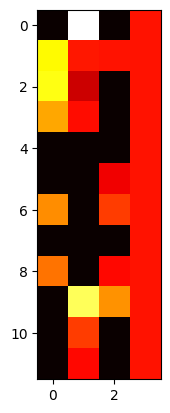

array([[0.  , 1.27, 0.  ],
       [0.94, 0.51, 0.5 ],
       [0.97, 0.37, 0.  ],
       [0.78, 0.49, 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.44],
       [0.73, 0.  , 0.58],
       [0.  , 0.  , 0.  ],
       [0.68, 0.  , 0.48],
       [0.  , 1.06, 0.74],
       [0.  , 0.58, 0.  ],
       [0.  , 0.48, 0.  ]])

In [2]:
sc2d = scores.reshape((-1, 3))
heatmaps([sc2d])
sc2d

In [13]:
i = np.unravel_index(sc2d.argmax(), scores.shape)
scores[i]

1.27

In [14]:
sep, slr = single_eps[i[0]], single_lr[i[2]]
i, sep, slr

((0, 0, 0, 0, 1), 500, 0.015848931924611134)

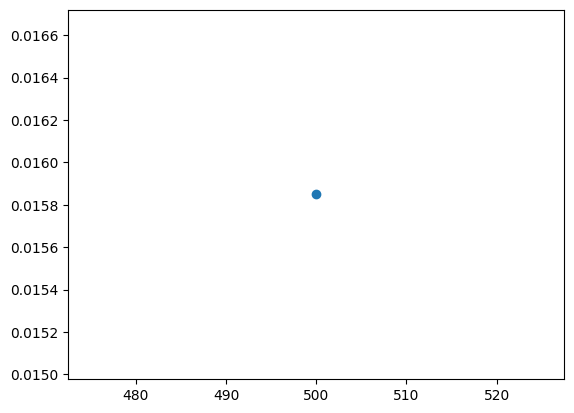

In [15]:
import matplotlib.pyplot as plt

# plt.plot(single_eps, single_lr)
plt.scatter(sep, slr)

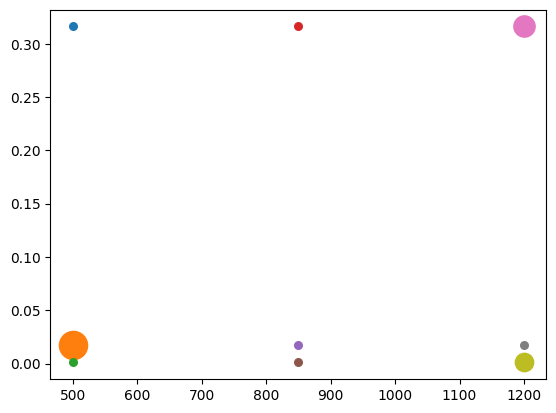

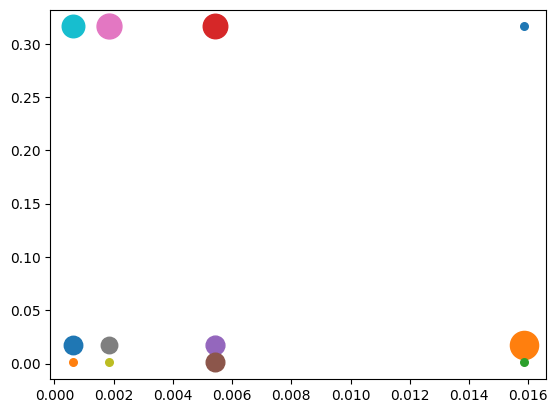

In [24]:

def twoDplot(ssd, l1, l2):
    for i in range(ssd.shape[0]):
        for j in range(ssd.shape[1]):
            plt.scatter(l1[i], l2[j], (ssd[i,j]+ 0.1)*300)  
    plt.show()

ssd = scores[:,0,:,0,:]
twoDplot(ssd[:, 0, :], single_eps, single_sample_size)
twoDplot(ssd[0, :, :], single_lr, single_sample_size)
twoDplot(ssd[:, :, 1], single_eps, single_lr)

In [ ]:
plt.scatter(single_eps)

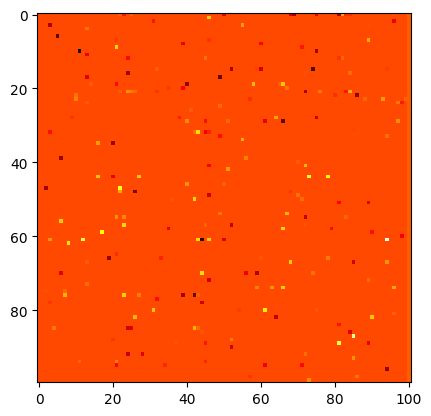

In [ ]:
heatmaps([(S * R * 10)[0:100, 0:100]]) 

In [ ]:
scores[1, 0, 2, 0, 2]

0.0

In [ ]:
scores.reshape((-1, 4))

array([[0.  , 0.  , 0.54, 0.79],
       [0.52, 0.53, 0.63, 0.52]])